In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))

## 1. Load Raw Data With Domain Age and status

In [3]:
phish=pd.read_csv("../data/malicious_phish_domain.csv")
phish.head()

,url,type,domain_age,domain_status
0,br-icloud.com.br,phishing,0,0
1,br-icloud.com.br,phishing,0,0
2,mp3raid.com/music/krizz_kaliko.html,benign,9214,2
3,bopsecrets.org/rexroth/cr/1.htm,benign,9234,2
4,http://www.garage-pirenne.be/index.php?option=...,defacement,0,0


In [4]:
phish.tail()

,url,type,domain_age,domain_status
137296,http://pastehtml.com/view/bc3pjqupk.html,phishing,0,0
137297,indianamusicscene.com/,benign,0,0
137298,english.ryukyushimpo.jp/2011/04/25/357/,benign,7407,2
137299,aso.com/listings/AircraftListings.aspx?m_id=10...,benign,9985,2
137300,pewterreport.com/index.php?option=com_k2&view=...,benign,8407,2


# 2. Analyze Raw Data

In [5]:
phish.shape[0]

137301

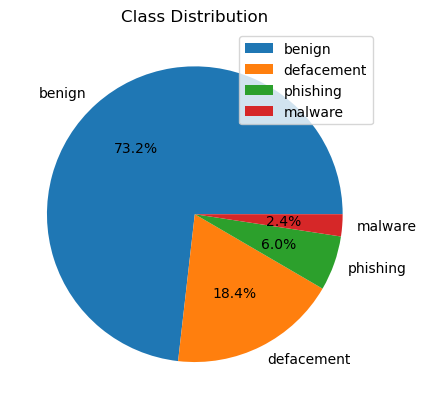

In [6]:
plt.pie(phish['type'].value_counts(), labels=['benign', 'defacement','phishing','malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

In [7]:
phish['type'].value_counts()

type
benign        100500
defacement     25269
phishing        8222
malware         3310
Name: count, dtype: int64

## 2. Load Raw data

In [ ]:
raw_df = pd.read_csv("../data/malicious_phish.csv")
malicious_df = raw_df[raw_df['type'] != 'benign' ]
malicious_df['type'].value_counts()


type
defacement    96457
phishing      94111
malware       32520
Name: count, dtype: int64

### 2.1 Take a sample of malicious dataset

In [9]:
sample_malicious_df = malicious_df.sample(n=80000)
sample_malicious_df['type'].value_counts()

type
defacement    34472
phishing      33657
malware       11871
Name: count, dtype: int64

In [10]:
sample_malicious_df.tail()

,url,type
468573,http://pajoohanco.com/index.php?view=article&c...,defacement
372836,http://appelboerderij.nl/kampeerboerderij-/1-k...,defacement
354561,http://www.arcolec.com/index.php?option=com_co...,defacement
321081,http://mo-artworks.com/blog/diverse-videos/des...,defacement
379894,http://www.disline.es/component/mailto/index.h...,defacement


In [11]:
sample_malicious_df['domain_age'] = 0
sample_malicious_df['domain_status'] = 0
sample_malicious_df.head()

,url,type,domain_age,domain_status
245564,http://cegtabla.com/index.html,defacement,0,0
142825,http://fietseling.org/~paypal/2614a9311e255dbb...,phishing,0,0
248177,http://wddga.com/index.php?option=com_content&...,defacement,0,0
529359,http://mynewblogspot070.blogspot.com,phishing,0,0
530371,https://deal8282.com/wp-includes/sodium_compat...,phishing,0,0


In [12]:
final_df = pd.concat([phish, sample_malicious_df])
final_df.drop_duplicates(inplace=True)
final_df['type'].value_counts()

type
benign        100500
defacement     50445
phishing       38938
malware         9822
Name: count, dtype: int64

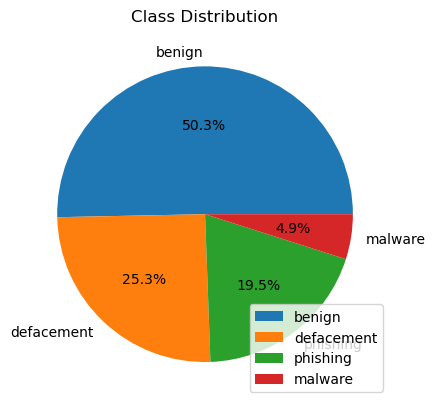

In [13]:
plt.pie(final_df['type'].value_counts(), labels=[
        'benign', 'defacement', 'phishing', 'malware'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.legend()
plt.show()

## 3. Data Processing

In [9]:
phish.isna().sum()

url              0
type             0
domain_age       0
domain_status    0
dtype: int64

In [10]:
# Remove duplicates
phish = phish.drop_duplicates()

# Check for missing values and drop rows them
phish = phish.dropna()

# Drop empty type rows
phish = phish[phish['type'] != '']

# Verify the cleaned data
phish['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [11]:
phish['type'].value_counts()

type
benign        100500
defacement     25180
phishing        8221
malware         1625
Name: count, dtype: int64

In [ ]:
phish['type'].isna().sum()

np.int64(0)

## 4. Feature Selection

### 4.1 Function to extract features from URLs

In [ ]:
from modules.feature_engineering import feature_engineering
def extract_type(row_type):
    switcher = {
        'benign': 0,
        'defacement': 1,
        'phishing': 2,
        'malware': 3
    }
    return switcher.get(row_type.lower().strip(), -1)

def extract_features(row):
    features = {}
    features['type'] = extract_type(row['type'])
    features.update(feature_engineering(row['url']))
    return features
    

ModuleNotFoundError: No module named 'modules'

In [ ]:

# Apply feature extraction to each row
features_list = phish.apply(extract_features, axis=1)

# Convert features into a DataFrame
final_df = pd.DataFrame(features_list.tolist())
final_df = final_df.dropna(how='any')
final_df.head()

,type,url_length,domain_length,domain_entropy,is_common_tld,shortening_service,is_https,is_http,special_characters,sensitive_words,file_extension,suspicious_query
0,2,16,16,3.375000,0,0,0,0,0,0,0,0
1,0,35,11,3.277613,1,0,0,0,0,0,5,0
2,0,31,14,3.235926,1,0,0,0,0,0,5,0
3,1,88,21,3.308751,1,0,0,1,7,0,5,0
4,1,235,23,3.501398,1,0,0,1,5,0,5,0


In [ ]:
final_df.tail()

,type,url_length,domain_length,domain_entropy,is_common_tld,shortening_service,is_https,is_http,special_characters,sensitive_words,file_extension,suspicious_query
641120,2,39,15,3.506891,1,1,0,0,0,0,5,0
641121,2,44,18,3.350209,1,1,0,0,0,0,0,0
641122,2,42,16,3.327820,1,1,0,0,0,0,0,0
641123,2,45,16,3.452820,1,0,0,0,0,0,0,0
641124,2,41,17,3.572469,1,0,0,0,0,0,0,0


In [ ]:
final_df.isna().sum()

type                  0
url_length            0
domain_length         0
domain_entropy        0
is_common_tld         0
shortening_service    0
is_https              0
is_http               0
special_characters    0
sensitive_words       0
file_extension        0
suspicious_query      0
dtype: int64

In [ ]:
final_df['type'].value_counts()

type
0    428080
1     95308
2     94092
3     23645
Name: count, dtype: int64

In [ ]:
final_df['is_common_tld'].value_counts()

is_common_tld
1    541817
0     99308
Name: count, dtype: int64

## Save data

In [ ]:
final_df.to_csv("../data/feature_engineered_data.csv", index=False)

##

In [ ]:
from sklearn.model_selection import train_test_split
X = final_df.drop('type', axis=1)
y = final_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

classifier = RandomForestClassifier(
    class_weight="balanced", random_state=42, n_estimators=200)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(
    f"Accuracy with Random Forest Classifier: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report with Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Accuracy with Random Forest Classifier: 0.9188
Classification Report with Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     85592
           1       0.95      0.98      0.96     18844
           2       0.73      0.77      0.75     19091
           3       0.94      0.92      0.93      4698

    accuracy                           0.92    128225
   macro avg       0.89      0.90      0.90    128225
weighted avg       0.92      0.92      0.92    128225

